### Topic 5 DQ2
Linear regression is a powerful tool for modeling relationships between variables in a dataset. However, there are limitations to linear regression that may result in biased or inaccurate predictions. Discuss at least two common assumptions of linear regression models and the potential consequences of violating these assumptions. How can Python be used to diagnose and address violations of these assumptions in a linear regression model? Provide at least one example of a linear regression model that violates one of these assumptions and how it can be improved.

##### Common assumptions of Linear Regression models
__1. Independence__ in a linear regression model is the assumption that each observation is independant of another. When this assumption is violated, data that is dependent causes autocorrelation. For example with time inflation grows. So if we make the assumption that the value of an item increases over time we may get autocorrelation due to dependent time data. When if we adjusted the data for inflation we may see that the actual value of the item is unchanged. 

Python can be used to investigate autocorrelation by using the Durbin-Watson Statistic. To apply this function in python we can use statsmodels.durbin_watson() to see if data points of one feature are likely to be independent or dependent of each other.

__2. Normality__ in a linear regression model assumes that errors follow a normal distribution. When this assumption is violated, the confidence intervals in our model are affected. This causes issues when estimating with least squares methods since the sum of residuals affect the fit of the model. 

In any case of regression we can improve our model by plotting our residuals to assess the appropriate regression model to fit the data. The python package statsmodels has a quantile plot function to visulize the distribution of our data. Shapiro-Wilk is another statistical test that can be used to asses the fit of our data. Scipy.stats has the shapiro() function that gives us a p-value to assess whether data is normally ditributed (p < 0.5) or not (p > 0.5).



In [1]:
#!pip install statsmodels

In [45]:
#import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson 
from statsmodels.formula.api import ols
from sklearn import linear_model

In [3]:
#read data from txt web
url = 'https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/data/earthquakes/index.txt'
data = pd.read_table(url)

In [4]:
df = pd.DataFrame(data)
df.head()

,Year,Quakes
0,1916,2
1,1917,5
2,1918,12
3,1919,8
4,1920,7


[Text(0.5, 1.0, 'Earthquakes > 7 Magnitude per Year')]

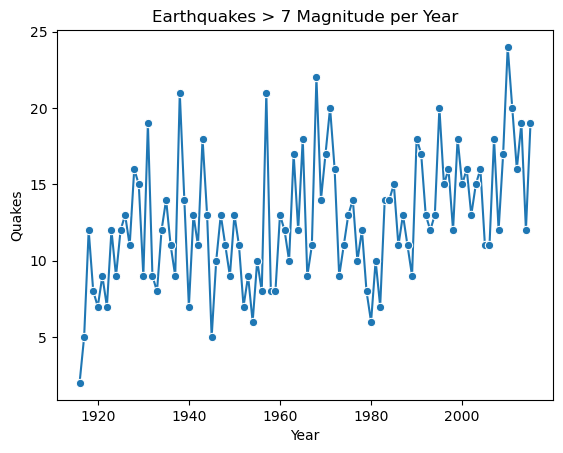

In [5]:
#plot Earthquakes over the years
sns.lineplot(data=df, x='Year',y='Quakes', marker='o').set(title='Earthquakes > 7 Magnitude per Year')

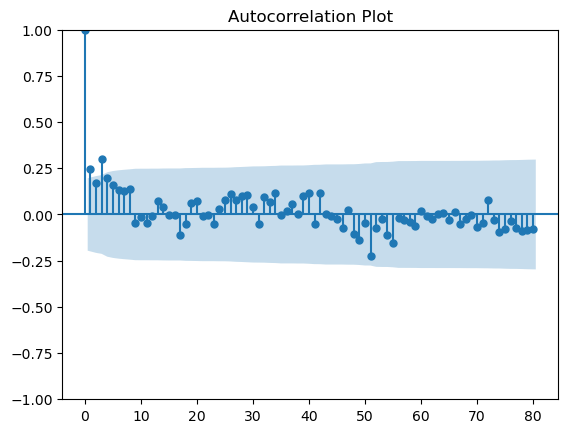

In [6]:
#visualize autocorrelation
plot_acf(df['Quakes'], lags=80)
plt.title("Autocorrelation Plot") 
plt.show()

One way to check if our data has autocorrelation is to visualize it. Here we use plot_acf from stats models, and put lags at 80.

In [7]:
#calculate residuals using ordinary least squares
model = ols('Quakes ~ Year', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Quakes   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     22.69
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           6.59e-06
Time:                        12:04:49   Log-Likelihood:                -275.32
No. Observations:                 100   AIC:                             554.6
Df Residuals:                      98   BIC:                             559.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -111.8068     26.121     -4.280      0.0

Here we use ols from statsmodel to get the residuals of our model as well as other insight on the data. I called quakes first which is our dependent variable and printed the summary. Here we even get the durbinwatson stat which quantifies the autocorrelation of our data. 

In [8]:
#calculate durbin watson
durbin_watson(model.resid)

1.7429938593484942

Durbin Watson calculation gives a number between 0 and 4 to estimate autocorrelation. The closer this quanitity is to 0 results in rejecting the hypothesis that there is no correlation among residuals. Our data falls under 2 which is considered to be autocorrelated based on the durbin watson statistics.

The ols model also notes for us that there might be strong multicollinearity in our data. One way to fix the autocorrelation coud be do fit our model on multiple variables such as adding quanity of quakes as a variable. If the dataset was more granular in time and allowed data per month, we may investigate the seasonality of the dataset.

In [26]:
quake_group = []

#we will use a for loop to append a new column that gives a value of 0 for < 15 quakes a year and 1 for >=15 quakes a year
for q in df['Quakes']:
    if q < 15:
        quake_group.append(0)
    if q >= 15:
        quake_group.append(1)

In [27]:
df['Quake Group'] = quake_group

In [29]:
#fit multiple regression
X = df[['Year', 'Quake Group']]
y = df['Quakes']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)

[0.0212292  6.90074114]


In [38]:
#calculate residuals
prediction = regr.predict(X)
residual = (y - prediction)

In [39]:
durbin_watson(residual)

1.7577306669518524

Here we can see that even with the addition of multiple variables, the autocorrelation has not been corrected.